**Classification of Credit Scores with Artificial Neural Networks**

**Inroduction**

The credit score of a person determines the creditworthiness of the person. It helps financial companies determine if you can repay the loan or credit you are applying for.

In [40]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import re

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

from scipy import stats
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import auc,accuracy_score,classification_report, roc_curve, confusion_matrix
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings("ignore")

In [41]:
train = pd.read_csv("/content/drive/MyDrive/Deep_Learning/Deep_Data_sets/Score.csv")
test = pd.read_csv("/content/drive/MyDrive/Deep_Learning/Deep_Data_sets/Score.csv")

In [42]:
len_train=len(train)
len_train

99960

In [43]:
len_test=len(test)
len_test

99960

In [44]:
df=pd.concat([train,test], axis=0).reset_index(drop=True)
df.head()

,Delay_from_due_date,Num_of_Delayed_Payment,Num_Credit_Inquiries,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Amount_invested_monthly,Monthly_Balance,Credit_Score,Credit_Mix,...,Age,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Monthly_Inhand_Salary,Changed_Credit_Limit,Outstanding_Debt,Total_EMI_per_month
0,3.0,7.0,4.0,26.822620,265.0,No,80.415295,312.494089,Good,Good,...,23.0,19114.12,3.0,4.0,3.0,4.0,1824.843333,11.27,809.98,49.574949
1,3.0,7.0,4.0,31.944960,265.0,No,118.280222,284.629162,Good,Good,...,23.0,19114.12,3.0,4.0,3.0,4.0,1824.843333,11.27,809.98,49.574949
2,3.0,7.0,4.0,28.609352,267.0,No,81.699521,331.209863,Good,Good,...,23.0,19114.12,3.0,4.0,3.0,4.0,1824.843333,11.27,809.98,49.574949
3,5.0,4.0,4.0,31.377862,268.0,No,199.458074,223.451310,Good,Good,...,23.0,19114.12,3.0,4.0,3.0,4.0,1824.843333,11.27,809.98,49.574949
4,6.0,4.0,4.0,24.797347,269.0,No,41.420153,341.489231,Good,Good,...,23.0,19114.12,3.0,4.0,3.0,4.0,1824.843333,11.27,809.98,49.574949


**Variable Description**

*   Delay_from_due_date: The average number of days delayed by the person from the date of payment
*   Num_of_Delayed_Payment: Number of payments delayed by the person
*   Num_Credit_Inquiries: The number of credit card inquiries by the person
*   Credit_Utilization_Ratio: The credit utilization ratio of the credit card of the customer
*   Credit_History_Age: The age of the credit history of the person
*   Payment_of_Min_Amount: Yes if the person paid the minimum amount to be paid only, otherwise no.
*   Amount_invested_monthly: The monthly amount invested by the person
*   Monthly_Balance: The monthly balance left in the account of the person
*   Credit_Score: The credit score of the person
*   Credit_Mix: Classification of Credit Mix of the customer
*   Age: The age of the person
*   Annual_Income: The Annual Income of the person
*   Num_Bank_Accounts: The number of bank accounts of the person
*   Num_Credit_Card: Number of credit cards the person is having
*   Interest_Rate: The interest rate on the credit card of the person
*   Num_of_Loan: The number of loans taken by the person from the bank
*   Monthly_Inhand_Salary: Monthly in-hand salary of the person
*   Changed_Credit_Limit: The percentage change in the credit card limit of the person
*   Outstanding_Debt: The outstanding balance of the person
*   Total_EMI_per_month: The total EMI per month of the person


In [45]:
df.shape

(199920, 21)

In [46]:
df_copy = df.copy()

In [47]:
# Check Duplicated value:
df_copy[df_copy.duplicated()]

,Delay_from_due_date,Num_of_Delayed_Payment,Num_Credit_Inquiries,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Amount_invested_monthly,Monthly_Balance,Credit_Score,Credit_Mix,...,Age,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Monthly_Inhand_Salary,Changed_Credit_Limit,Outstanding_Debt,Total_EMI_per_month
99960,3.0,7.0,4.0,26.822620,265.0,No,80.415295,312.494089,Good,Good,...,23.0,19114.12,3.0,4.0,3.0,4.0,1824.843333,11.27,809.98,49.574949
99961,3.0,7.0,4.0,31.944960,265.0,No,118.280222,284.629162,Good,Good,...,23.0,19114.12,3.0,4.0,3.0,4.0,1824.843333,11.27,809.98,49.574949
99962,3.0,7.0,4.0,28.609352,267.0,No,81.699521,331.209863,Good,Good,...,23.0,19114.12,3.0,4.0,3.0,4.0,1824.843333,11.27,809.98,49.574949
99963,5.0,4.0,4.0,31.377862,268.0,No,199.458074,223.451310,Good,Good,...,23.0,19114.12,3.0,4.0,3.0,4.0,1824.843333,11.27,809.98,49.574949
99964,6.0,4.0,4.0,24.797347,269.0,No,41.420153,341.489231,Good,Good,...,23.0,19114.12,3.0,4.0,3.0,4.0,1824.843333,11.27,809.98,49.574949
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199915,23.0,7.0,3.0,34.663572,378.0,No,60.971333,479.866228,Poor,Good,...,25.0,39628.99,4.0,6.0,7.0,2.0,3359.415833,11.50,502.38,35.104023
199916,18.0,7.0,3.0,40.565631,379.0,No,54.185950,496.651610,Poor,Good,...,25.0,39628.99,4.0,6.0,7.0,2.0,3359.415833,11.50,502.38,35.104023
199917,27.0,6.0,3.0,41.255522,380.0,No,24.028477,516.809083,Poor,Good,...,25.0,39628.99,4.0,6.0,7.0,2.0,3359.415833,11.50,502.38,35.104023
199918,20.0,6.0,3.0,33.638208,381.0,No,251.672582,319.164979,Standard,Good,...,25.0,39628.99,4.0,6.0,7.0,2.0,3359.415833,11.50,502.38,35.104023


In [48]:
df_types=df.dtypes
df_types

Delay_from_due_date         float64
Num_of_Delayed_Payment      float64
Num_Credit_Inquiries        float64
Credit_Utilization_Ratio    float64
Credit_History_Age          float64
Payment_of_Min_Amount        object
Amount_invested_monthly     float64
Monthly_Balance             float64
Credit_Score                 object
Credit_Mix                   object
Payment_Behaviour            object
Age                         float64
Annual_Income               float64
Num_Bank_Accounts           float64
Num_Credit_Card             float64
Interest_Rate               float64
Num_of_Loan                 float64
Monthly_Inhand_Salary       float64
Changed_Credit_Limit        float64
Outstanding_Debt            float64
Total_EMI_per_month         float64
dtype: object

In [49]:
df.isnull().sum()

Delay_from_due_date         0
Num_of_Delayed_Payment      0
Num_Credit_Inquiries        0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Amount_invested_monthly     0
Monthly_Balance             0
Credit_Score                0
Credit_Mix                  0
Payment_Behaviour           0
Age                         0
Annual_Income               0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Monthly_Inhand_Salary       0
Changed_Credit_Limit        0
Outstanding_Debt            0
Total_EMI_per_month         0
dtype: int64

In [50]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Delay_from_due_date,199920.0,21.095718,14.827377,0.000000,10.000000,18.000000,28.000000,67.000000
Num_of_Delayed_Payment,199920.0,13.336345,6.269948,0.000000,9.000000,14.000000,18.000000,28.000000
Num_Credit_Inquiries,199920.0,5.774570,3.862215,0.000000,3.000000,5.000000,8.000000,29.000000
Credit_Utilization_Ratio,199920.0,32.284544,5.116876,20.000000,28.052051,32.305470,36.496305,50.000000
Credit_History_Age,199920.0,221.122819,99.695834,1.000000,144.000000,219.000000,302.000000,404.000000
Amount_invested_monthly,199920.0,193.665219,194.782250,0.000000,73.708522,129.342067,234.323706,1977.326102
Monthly_Balance,199920.0,403.445100,214.386555,0.007760,270.317007,337.237873,471.904834,1602.040519
Age,199920.0,33.269228,10.762344,14.000000,24.000000,33.000000,42.000000,56.000000
Annual_Income,199920.0,50498.704153,38294.147387,7005.930000,19338.480000,36996.830000,71681.400000,179987.280000
Num_Bank_Accounts,199920.0,5.368868,2.591662,0.000000,3.000000,5.000000,7.000000,10.000000


In [51]:
# describe for categorical variable
df.describe(include='object').T

,count,unique,top,freq
Payment_of_Min_Amount,199920,3,Yes,104652
Credit_Score,199920,3,Standard,106298
Credit_Mix,199920,3,Standard,91664
Payment_Behaviour,199920,6,Low_spent_Small_value_payments,67824


**Editing Numeric Data**

In [52]:
df["Num_of_Loan"].unique()

array([4., 1., 3., 0., 2., 7., 5., 6., 8., 9.])

In [53]:
df2=df.copy()
df2["Utilization_Ratio_Bin"]=["(0-10)" if i<=10 else "10-20"
                               if (i>10 and i<=20) else "20-30"
                               if (i>20 and i<=30) else "30-40"
                               if (i>30 and i<=40) else "40-50"
                               if (i>40 and i<=50) else "50-60" for i in df2["Credit_Utilization_Ratio"]]
df2.head()

,Delay_from_due_date,Num_of_Delayed_Payment,Num_Credit_Inquiries,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Amount_invested_monthly,Monthly_Balance,Credit_Score,Credit_Mix,...,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Monthly_Inhand_Salary,Changed_Credit_Limit,Outstanding_Debt,Total_EMI_per_month,Utilization_Ratio_Bin
0,3.0,7.0,4.0,26.822620,265.0,No,80.415295,312.494089,Good,Good,...,19114.12,3.0,4.0,3.0,4.0,1824.843333,11.27,809.98,49.574949,20-30
1,3.0,7.0,4.0,31.944960,265.0,No,118.280222,284.629162,Good,Good,...,19114.12,3.0,4.0,3.0,4.0,1824.843333,11.27,809.98,49.574949,30-40
2,3.0,7.0,4.0,28.609352,267.0,No,81.699521,331.209863,Good,Good,...,19114.12,3.0,4.0,3.0,4.0,1824.843333,11.27,809.98,49.574949,20-30
3,5.0,4.0,4.0,31.377862,268.0,No,199.458074,223.451310,Good,Good,...,19114.12,3.0,4.0,3.0,4.0,1824.843333,11.27,809.98,49.574949,30-40
4,6.0,4.0,4.0,24.797347,269.0,No,41.420153,341.489231,Good,Good,...,19114.12,3.0,4.0,3.0,4.0,1824.843333,11.27,809.98,49.574949,20-30


This line adds a new column named "Utilization_Ratio_Bin," derived from the "Credit_Utilization_Ratio" column. A conditional if-else statement is used to categorize each value into specific intervals. For example, if the "Credit_Utilization_Ratio" value is 10 or less, it is labeled as "(0-10)"; if it is between 10 and 20, it is labeled as "10-20," and so on. This process involves grouping the original continuous numerical values into specific intervals, creating a categorical variable.

In [54]:
df2["Payment_Behaviour"].unique()

array(['High_spent_Medium_value_payments',
       'High_spent_Large_value_payments',
       'High_spent_Small_value_payments',
       'Low_spent_Large_value_payments', 'Low_spent_Small_value_payments',
       'Low_spent_Medium_value_payments'], dtype=object)

In [55]:
u_rat_list = list(df2["Utilization_Ratio_Bin"].unique())
p_beh_list = list(df2["Payment_Behaviour"].unique())
High_spent_Small = []
Low_spent_Large = []
Low_spent_Medium = []
Low_spent_Small = []
High_spent_Medium = []
High_spent_Large = []

for i in p_beh_list:
    for j in u_rat_list:
        x = df2[df2["Utilization_Ratio_Bin"] == j]
        if i == "High_spent_Small_value_payments":
            High_spent_Small.append((len(x[x["Payment_Behaviour"] == i]) / len(x)) * 100)
        elif i == "Low_spent_Large_value_payments":
            Low_spent_Large.append((len(x[x["Payment_Behaviour"] == i]) / len(x)) * 100)
        elif i == "Low_spent_Medium_value_payments":
            Low_spent_Medium.append((len(x[x["Payment_Behaviour"] == i]) / len(x)) * 100)
        elif i == "Low_spent_Small_value_payments":
            Low_spent_Small.append((len(x[x["Payment_Behaviour"] == i]) / len(x)) * 100)
        elif i == "High_spent_Medium_value_payments":
            High_spent_Medium.append((len(x[x["Payment_Behaviour"] == i]) / len(x)) * 100)
        elif i == "High_spent_Large_value_payments":
            High_spent_Large.append((len(x[x["Payment_Behaviour"] == i]) / len(x)) * 100)

This code is used to analyze the relationship between two different categorical features, "Utilization_Ratio_Bin" and "Payment_Behaviour". It is a script containing a loop designed to understand the context between these two features and calculate percentages based on this context.

The primary purpose of this code is to analyze the relationship between the "Utilization_Ratio_Bin" and "Payment_Behaviour" features and calculate the percentage of observations with specific characteristics under these categories. This can be useful for examining the proportions of subsets that meet specific conditions in the dataset.

In [56]:
dic={"High_spent_Small_value_payments":High_spent_Small,
    "Low_spent_Large_value_payments":Low_spent_Large,
    "Low_spent_Medium_value_payments":Low_spent_Medium,
    "Low_spent_Small_value_payments":Low_spent_Small,
    "High_spent_Medium_value_payments":High_spent_Medium,
    "High_spent_Large_value_payments":High_spent_Large}

df3=pd.DataFrame(dic)
df3["Utilization_Ratio_Bin"]=list(df2["Utilization_Ratio_Bin"].unique())
df3

,High_spent_Small_value_payments,Low_spent_Large_value_payments,Low_spent_Medium_value_payments,Low_spent_Small_value_payments,High_spent_Medium_value_payments,High_spent_Large_value_payments,Utilization_Ratio_Bin
0,6.464391,6.002256,10.312766,37.210134,26.096883,13.913570,20-30
1,6.647539,5.733200,10.211560,33.419179,26.883988,17.104535,30-40
2,5.496608,4.539920,11.254131,18.246652,29.326839,31.135850,40-50
3,0.000000,0.000000,0.000000,0.000000,100.000000,0.000000,50-60
4,0.000000,0.000000,0.000000,100.000000,0.000000,0.000000,10-20


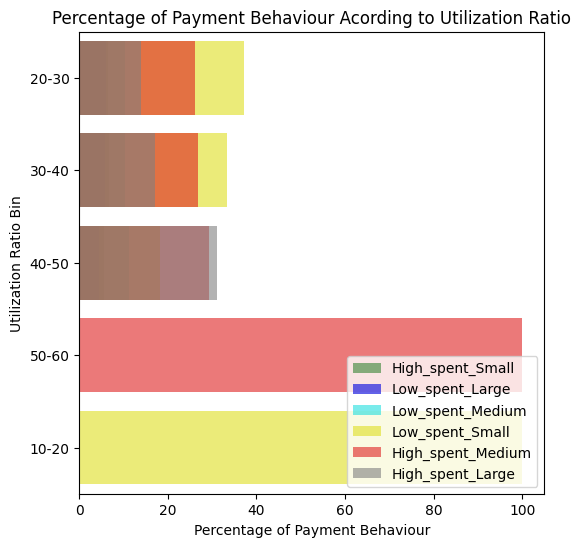

In [57]:
f,ax=plt.subplots(figsize=(6,6))
sns.barplot(x=High_spent_Small,y=u_rat_list,color="green",alpha=0.5,label="High_spent_Small")
sns.barplot(x=Low_spent_Large,y=u_rat_list,color="blue",alpha=0.7,label="Low_spent_Large")
sns.barplot(x=Low_spent_Medium,y=u_rat_list,color="cyan",alpha=0.6,label="Low_spent_Medium")
sns.barplot(x=Low_spent_Small,y=u_rat_list,color="yellow",alpha=0.6,label="Low_spent_Small")
sns.barplot(x=High_spent_Medium,y=u_rat_list,color="red",alpha=0.6,label="High_spent_Medium")
sns.barplot(x=High_spent_Large,y=u_rat_list,color="gray",alpha=0.6,label="High_spent_Large")

ax.legend(loc="lower right",frameon=True)
ax.set(xlabel="Percentage of Payment Behaviour",ylabel="Utilization Ratio Bin",title="Percentage of Payment Behaviour Acording to Utilization Ratio")
plt.show()

Each bar represents the percentage of the respective "Payment_Behaviour" category based on the "Utilization_Ratio_Bin" categories. The height of the bars represents the percentage of observations for a specific "Payment_Behaviour" category within a particular "Utilization_Ratio_Bin" category.

The graph visualizes the distribution of different "Payment_Behaviour" categories across "Utilization_Ratio_Bin" categories, providing insight into the relationship between these two features. Colors and labels help distinguish between different categories in the graph.

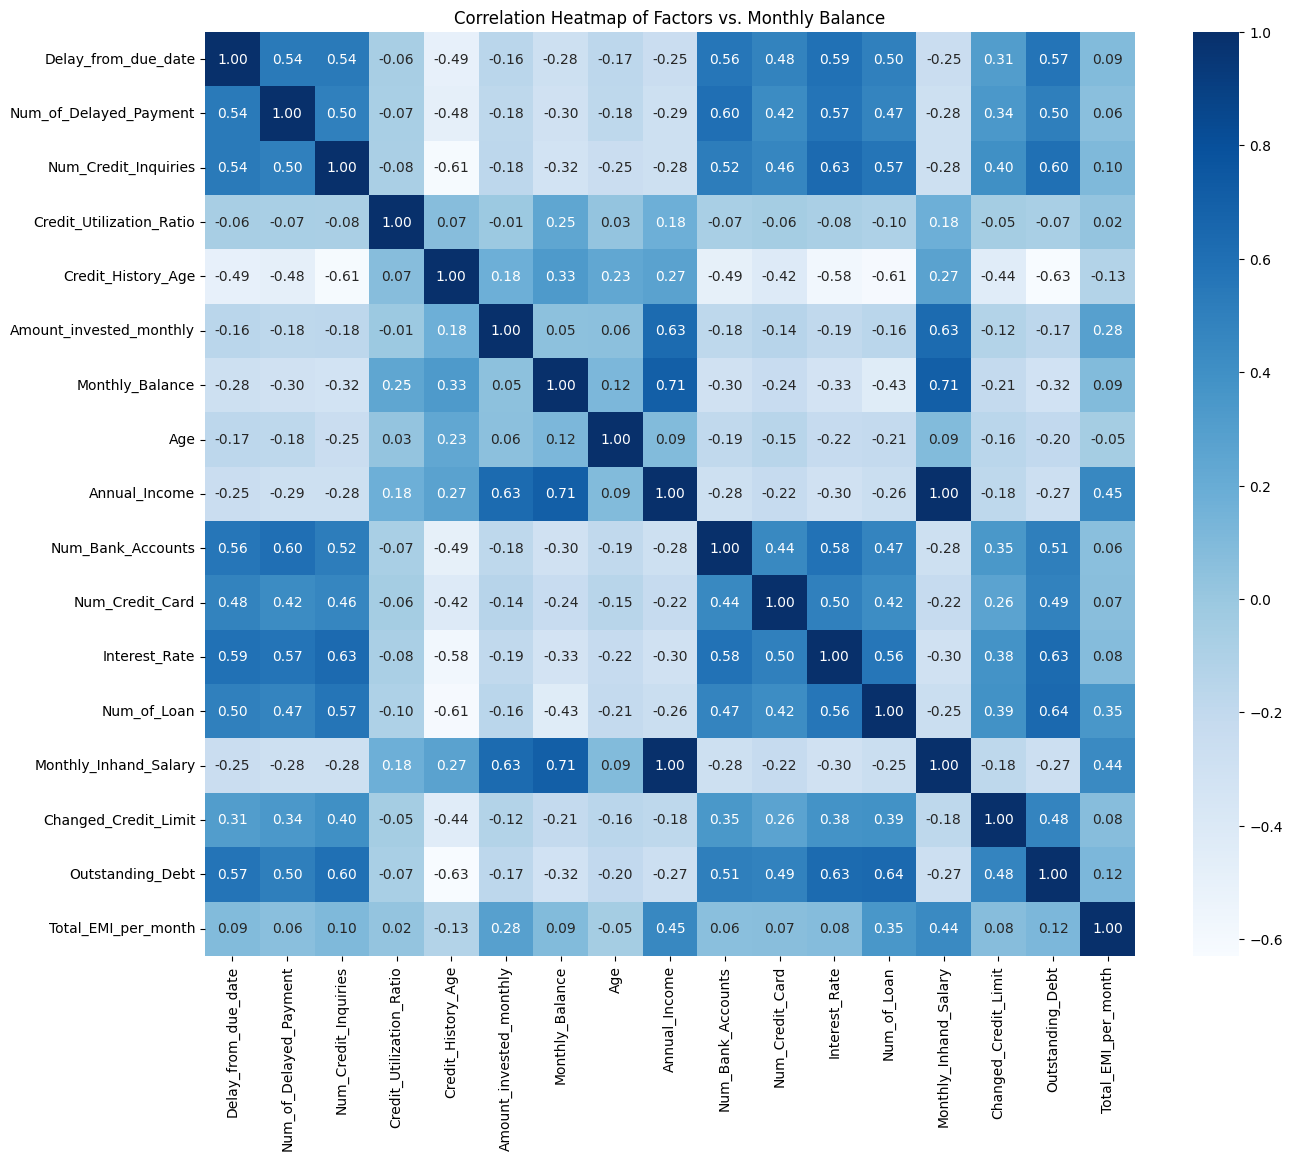

In [58]:
selected_columns=df.select_dtypes(include=["number"])

correlation_matrix=selected_columns.corr()

plt.figure(figsize=(15,12))
sns.heatmap(correlation_matrix,annot=True, cmap="Blues",fmt=".2f")
plt.title("Correlation Heatmap of Factors vs. Monthly Balance")
plt.show()

In [59]:
# df.drop("monthly_Inhand_Salary", axis=1, inplace=True)  # 1.00 corr çok yüksek olduğundan birini drop etmek mecburiyetindeyiz

KeyError: "['monthly_Inhand_Salary'] not found in axis"

In [61]:
df_train = df[:len_train]
df_test = df[len_train:]

**Data Preprocessing**

In this section, we will perform data preprocessing before training the data in artificial neural networks.
*   Generating dummy values to prevent overfitting.
*   Selecting a variable
*   Normalization and encoding
*   Train Test Split

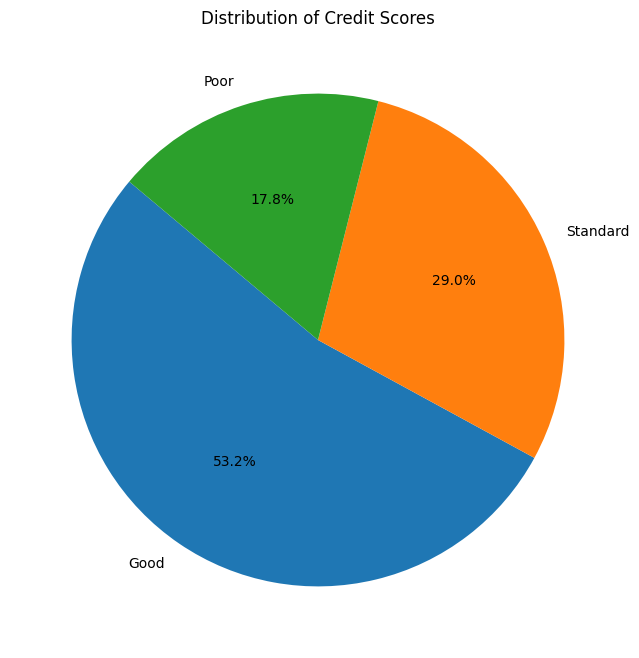

In [62]:
plt.figure(figsize=(8, 8))
plt.pie(df_train['Credit_Score'].value_counts(), labels=df_train['Credit_Score'].unique(), autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Credit Scores')
plt.show()

In [63]:
# Encoding

columns=["Credit_Score"]

for item in columns:
    df_train[item]=LabelEncoder().fit_transform(df_train[item])
df_train.head()

,Delay_from_due_date,Num_of_Delayed_Payment,Num_Credit_Inquiries,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Amount_invested_monthly,Monthly_Balance,Credit_Score,Credit_Mix,...,Age,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Monthly_Inhand_Salary,Changed_Credit_Limit,Outstanding_Debt,Total_EMI_per_month
0,3.0,7.0,4.0,26.822620,265.0,No,80.415295,312.494089,0,Good,...,23.0,19114.12,3.0,4.0,3.0,4.0,1824.843333,11.27,809.98,49.574949
1,3.0,7.0,4.0,31.944960,265.0,No,118.280222,284.629162,0,Good,...,23.0,19114.12,3.0,4.0,3.0,4.0,1824.843333,11.27,809.98,49.574949
2,3.0,7.0,4.0,28.609352,267.0,No,81.699521,331.209863,0,Good,...,23.0,19114.12,3.0,4.0,3.0,4.0,1824.843333,11.27,809.98,49.574949
3,5.0,4.0,4.0,31.377862,268.0,No,199.458074,223.451310,0,Good,...,23.0,19114.12,3.0,4.0,3.0,4.0,1824.843333,11.27,809.98,49.574949
4,6.0,4.0,4.0,24.797347,269.0,No,41.420153,341.489231,0,Good,...,23.0,19114.12,3.0,4.0,3.0,4.0,1824.843333,11.27,809.98,49.574949


In [64]:
df_train['Credit_Score'].value_counts()

2    53149
1    28988
0    17823
Name: Credit_Score, dtype: int64

In [65]:
# !pip install category_encoders


In [66]:
import category_encoders as ce

columns = ['Payment_of_Min_Amount','Payment_Behaviour','Credit_Mix']
for item in columns:
    df_train[item] = ce.LeaveOneOutEncoder().fit_transform(df_train[item],df_train['Credit_Score'])
df_train.head()

,Delay_from_due_date,Num_of_Delayed_Payment,Num_Credit_Inquiries,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Amount_invested_monthly,Monthly_Balance,Credit_Score,Credit_Mix,...,Age,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Monthly_Inhand_Salary,Changed_Credit_Limit,Outstanding_Debt,Total_EMI_per_month
0,3.0,7.0,4.0,26.822620,265.0,1.099222,80.415295,312.494089,0,0.86271,...,23.0,19114.12,3.0,4.0,3.0,4.0,1824.843333,11.27,809.98,49.574949
1,3.0,7.0,4.0,31.944960,265.0,1.099222,118.280222,284.629162,0,0.86271,...,23.0,19114.12,3.0,4.0,3.0,4.0,1824.843333,11.27,809.98,49.574949
2,3.0,7.0,4.0,28.609352,267.0,1.099222,81.699521,331.209863,0,0.86271,...,23.0,19114.12,3.0,4.0,3.0,4.0,1824.843333,11.27,809.98,49.574949
3,5.0,4.0,4.0,31.377862,268.0,1.099222,199.458074,223.451310,0,0.86271,...,23.0,19114.12,3.0,4.0,3.0,4.0,1824.843333,11.27,809.98,49.574949
4,6.0,4.0,4.0,24.797347,269.0,1.099222,41.420153,341.489231,0,0.86271,...,23.0,19114.12,3.0,4.0,3.0,4.0,1824.843333,11.27,809.98,49.574949



This code utilizes the category_encoders library to apply the Leave-One-Out Encoding method to categorical variables. Leave-One-Out Encoding is a coding technique that assigns numerical values to categorical variables by comparing each observation with the others.

As Leave-One-Out Encoding transforms each observation into a numerical value by comparing it with other observations, encoding methods like this help convert categorical data into numerical format, aiding machine learning models in working more effectively with such data.

In [67]:
# Feature Selection With VIF
X=df_train.drop('Credit_Score',axis=1)
y = df_train.Credit_Score

smote = SMOTE() # Synthetic Minority Oversampling TEchnique
X, y = smote.fit_resample(X,y)

In [68]:
## VIF Test (Variance Inflation Factor) testini uygular ve bağımsız değişkenler arasındaki çoklu doğrusallığı kontrol etmeyi amaçlar.

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

vif_data=pd.DataFrame()
vif_data["target"]=X.columns
vif_data["VIF"]=[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_data

,target,VIF
0,Delay_from_due_date,6.064446
1,Num_of_Delayed_Payment,10.849946
2,Num_Credit_Inquiries,7.657852
3,Credit_Utilization_Ratio,48.811739
4,Credit_History_Age,14.356257
5,Payment_of_Min_Amount,155.357501
6,Amount_invested_monthly,9.749915
7,Monthly_Balance,31.982449
8,Credit_Mix,36.611656
9,Payment_Behaviour,185.033051


In [69]:
vif_data[vif_data["VIF"]>5]

,target,VIF
0,Delay_from_due_date,6.064446
1,Num_of_Delayed_Payment,10.849946
2,Num_Credit_Inquiries,7.657852
3,Credit_Utilization_Ratio,48.811739
4,Credit_History_Age,14.356257
5,Payment_of_Min_Amount,155.357501
6,Amount_invested_monthly,9.749915
7,Monthly_Balance,31.982449
8,Credit_Mix,36.611656
9,Payment_Behaviour,185.033051


In [70]:
smote = SMOTE() # Synthetic Minority Oversampling TEchnique
X, y = smote.fit_resample(X,y)

In [71]:
# Standardization:
sc=StandardScaler()
X=sc.fit_transform(X)

In [72]:
import tensorflow as tf
from tensorflow import keras
from keras.utils import to_categorical

y=to_categorical(y, num_classes=3) # format [0,0,1]

In [73]:
# Train-Test-Split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,shuffle=True,random_state=42)

In [74]:
X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.1,random_state=42)

**Model Building**

In [75]:
 # !pip install scikeras

In [76]:
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.callbacks import EarlyStopping
from keras.optimizers import RMSprop, Adam
from keras.regularizers import L2

In [77]:
model=Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(64, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(64, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(3, activation="softmax"))
model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

es=EarlyStopping(monitor="val_accuracy",patience=20,mode="max",verbose=1)

hist=model.fit(X_train,
               y_train,
               epochs=500,
               batch_size=512,
               validation_data=(X_val,y_val),
               verbose=0,callbacks=[es])

Epoch 174: early stopping


In [78]:
history_dict=hist.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

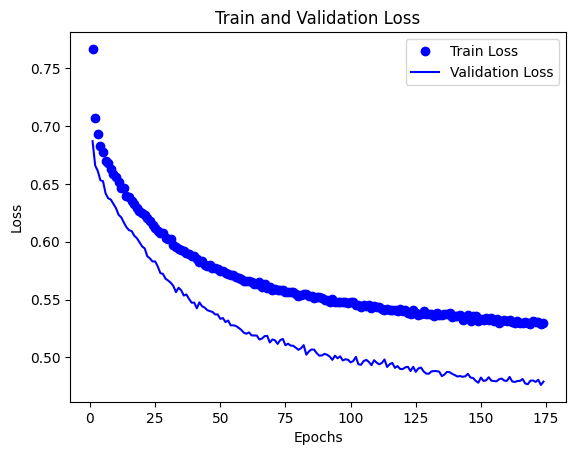

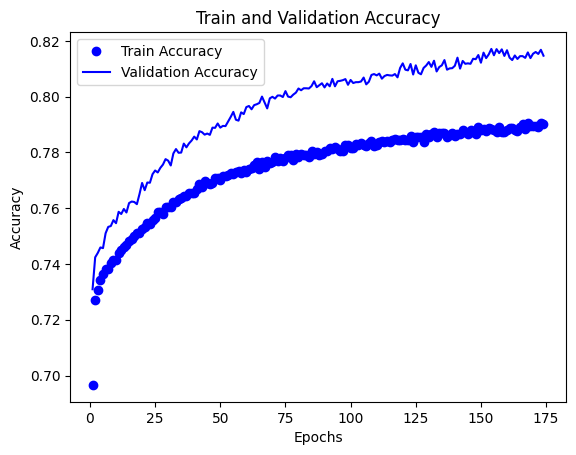

In [79]:
# model evulate:
loss_values=history_dict["loss"]
val_loss_values=history_dict["val_loss"]

epochs=range(1,len(loss_values)+1)

plt.plot(epochs,loss_values, "bo", label="Train Loss")
plt.plot(epochs,val_loss_values, "b", label="Validation Loss")
plt.title("Train and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

plt.figure()

acc=history_dict["accuracy"]
val_acc=history_dict["val_accuracy"]

epochs=range(1,len(loss_values)+1)

plt.plot(epochs,acc, "bo", label="Train Accuracy")
plt.plot(epochs,val_acc, "b", label="Validation Accuracy")
plt.title("Train and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [80]:
results=model.evaluate(X_test, y_test)
results

997/997 [==============================] - 2s 2ms/step - loss: 0.4848 - accuracy: 0.8100


[0.4847851097583771, 0.8099717497825623]

399/399 [==============================] - 1s 2ms/step


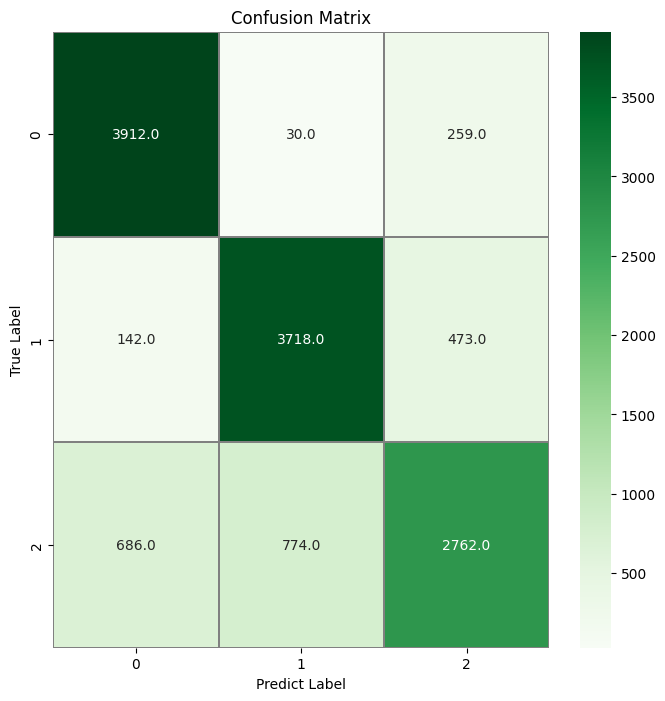

In [81]:
# confusion matrix
# Predict the values from validation dataset
Y_pred=model.predict(X_val)
# Convert predictions classes to one hot vectors
Y_pred_classes=np.argmax(Y_pred, axis=1)
# Convert validation observation to one hot vectors
Y_true=np.argmax(y_val, axis=1)
# Compute the confusion matrix
confusion_mtx=confusion_matrix(Y_true,Y_pred_classes)
# plot confusion matrix
f,ax=plt.subplots(figsize=(8,8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01, cmap="Greens", linecolor="gray", fmt=".1f", ax=ax)
plt.xlabel("Predict Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

997/997 [==============================] - 2s 2ms/step


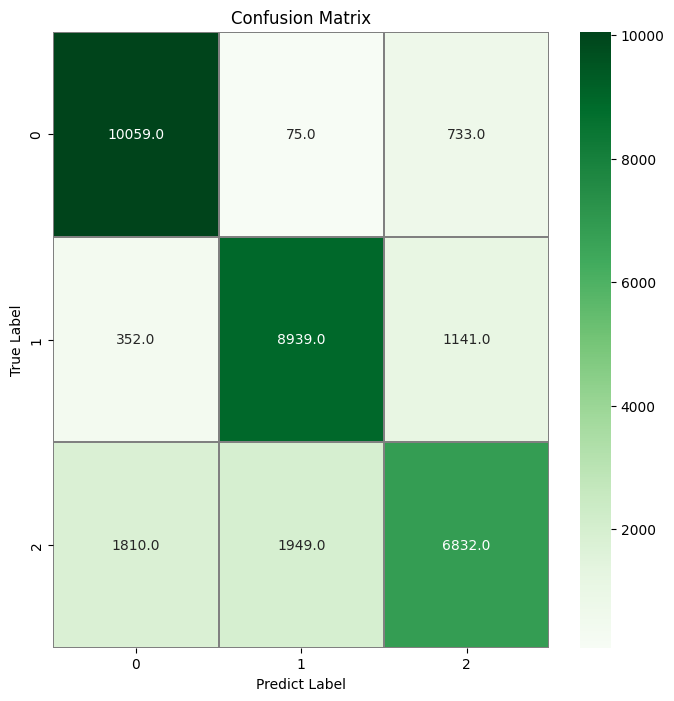

In [82]:
# For TEST
# confusion matrix
# Predict the values from validation dataset
Y_pred=model.predict(X_test)
# Convert predictions classes to one hot vectors
Y_pred_classes=np.argmax(Y_pred, axis=1)
# Convert validation observation to one hot vectors
Y_true=np.argmax(y_test, axis=1)
# Compute the confusion matrix
confusion_mtx=confusion_matrix(Y_true,Y_pred_classes)
# plot confusion matrix
f,ax=plt.subplots(figsize=(8,8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01, cmap="Greens", linecolor="gray", fmt=".1f", ax=ax)
plt.xlabel("Predict Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()